In [12]:
import pandas as pd
import matplotlib.pyplot as plt

## Task 1 - Countries Demographic Data

In [38]:
# raw data in lists
France = [16127955, 15805560, 17386612, 13960064, 4142050]
Germany = [15294292, 20447052, 23900423, 17988340, 5389106]
Italy = [10859356, 13275488, 18594885, 13299743, 4330074]
Spain = [9254305, 11015526, 14787185, 9182427, 2860952]
UK = [15746113, 17509234, 17554612, 13284207, 3437008]

AgeGroups = ["0-19", "20-39", "40-59", "60-79", "80+"]
Countries = ["France", "Germany", "Italy", "Spain", "UK"]

Colours = ["blue", "yellow", "green", "red", "yellow"]

import pandas as pd

# construct a dataframe from the lists, but beware that default is to fill by row
# no = pd.DataFrame(France, Germany, Italy, Spain, UK], columns = Countries, index = AgeGroups)
# no
# better to define columnTitle:columnContent pairs ... 
df = pd.DataFrame({"France":France, "Germany":Germany, "Italy":Italy, "Spain":Spain, "UK":UK}, index = AgeGroups)
df

,France,Germany,Italy,Spain,UK
0-19,16127955,15294292,10859356,9254305,15746113
20-39,15805560,20447052,13275488,11015526,17509234
40-59,17386612,23900423,18594885,14787185,17554612
60-79,13960064,17988340,13299743,9182427,13284207
80+,4142050,5389106,4330074,2860952,3437008


In [42]:
print("Check of population totals as a sanity check that data entry is ok\n", df.sum())

Check of population totals as a sanity check that data entry is ok
 France     67422241
Germany    83019213
Italy      60359546
Spain      47100395
UK         67531174
dtype: int64


In [43]:
# (a) Explore the metadata of the data frame
print("DataFrame columns", df.columns)
print("DataFrame rows", df.index)
print("DataFrame shape is #rows by #columns", df.shape)
print("DataFrame datatypes:\n", df.dtypes)
df.head(2)

DataFrame columns Index(['France', 'Germany', 'Italy', 'Spain', 'UK'], dtype='object')
DataFrame rows Index(['0-19', '20-39', '40-59', '60-79', '80+'], dtype='object')
DataFrame shape is #rows by #columns (5, 5)
DataFrame datatypes:
 France     int64
Germany    int64
Italy      int64
Spain      int64
UK         int64
dtype: object


,France,Germany,Italy,Spain,UK
0-19,16127955,15294292,10859356,9254305,15746113
20-39,15805560,20447052,13275488,11015526,17509234


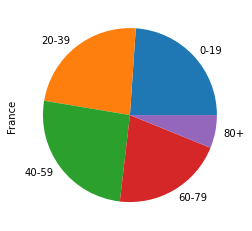

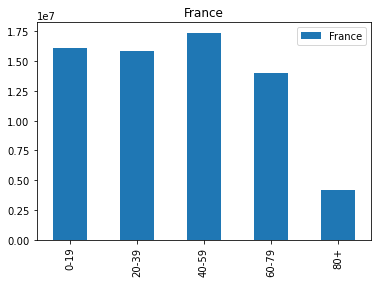

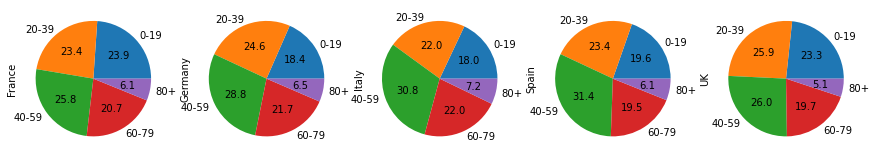

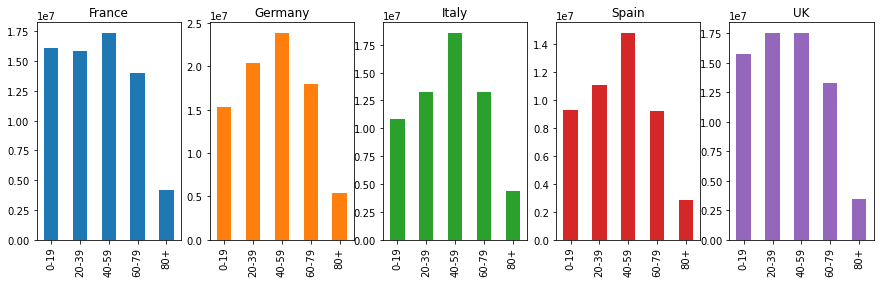

In [51]:
# (b) Explore the metadata of the data frame
# we could of course do one plot at a time e.g. 
df.plot.pie(y = 'France', legend = False)
plt.show()
df.plot.bar(y = 'France', title = "France")
plt.show()
# but pandas can achieve all 5 with one command 
df.plot.pie(subplots=True, figsize = (15,4), legend = False, autopct = '%1.1f')
plt.show()
df.plot.bar(y = df.columns, figsize = (15,4), legend = False, subplots = True, layout = (1,5))
plt.show()

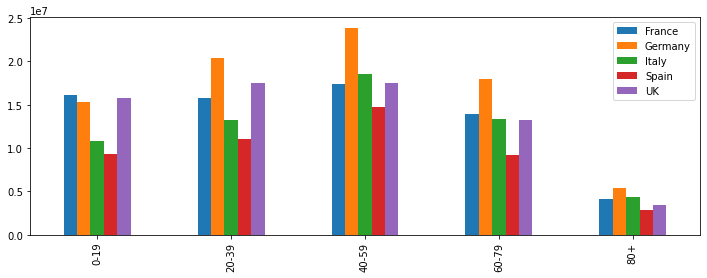

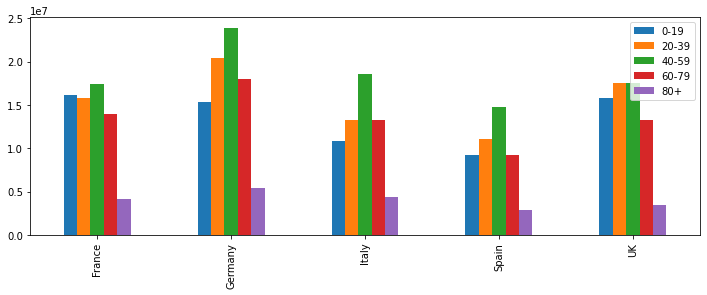

In [45]:
# (c) Clustered Bar Chart is the default when applying plot.bar to entire dataframe
df.plot.bar(figsize = (12,4))
plt.show()
# to cluster by country take transpose of the dataframe (i.e. swap rows and columns)
df2 = df.transpose()
df2.plot.bar(figsize = (12,4))
plt.show()

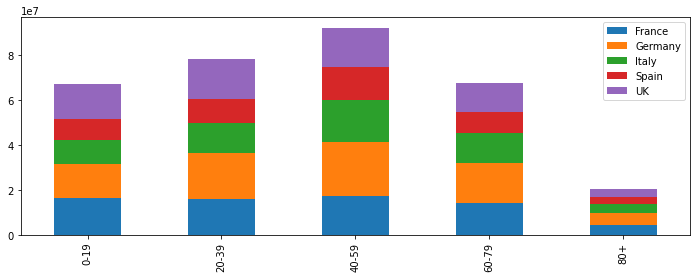

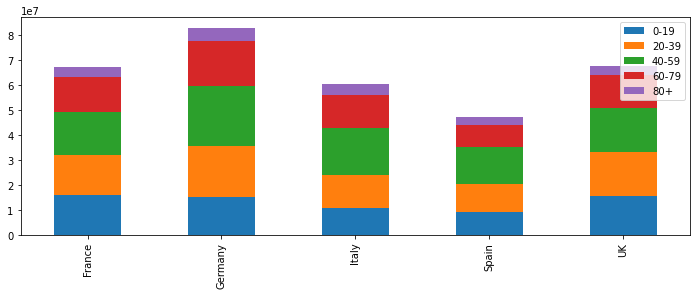

In [46]:
# (c) Clustered Bar Chart is the default when applying plot.bar to entire dataframe
df.plot.bar(stacked = True, figsize = (12,4))
plt.show()
# to cluster by country take transpose of the dataframe (i.e. swap rows and columns)
df2 = df.transpose()
df2.plot.bar(stacked = True, figsize = (12,4))
plt.show()

Lots of observations are possible:
* Germany has highest population, Spain has lowest
* Most common age range across the counties is 40-59 ... Western Europe is "middle-aged", with Italy and Spain showing most obvious effect
* Curiously UK seems to have marginally younger population with 20-39 and 40-59 roughly equal
* Smallest age range is 80+
* France and UK have highest proportions of people 0-19

## Task 2 - Loading insurance.csv data file 

In [52]:
import pandas as pd
## You will have to adapt the pathname to match the drive and location on your own PC
insur = pd.read_csv("C:/Data/insurance.csv")

insur

,age,gender,bmi,children,smoker,city,cost
0,19,female,27.900,0,yes,Aberdeen,17330.99
1,18,male,33.770,1,no,Glasgow,1892.99
2,28,male,33.000,3,no,Glasgow,4680.12
3,33,male,22.705,0,no,Dundee,22345.30
4,32,male,28.880,0,no,Dundee,4235.46
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,Dundee,10902.58
1334,18,female,31.920,0,no,Edinburgh,2219.95
1335,18,female,36.850,0,no,Glasgow,1789.07
1336,21,female,25.800,0,no,Aberdeen,2081.88


In [53]:
insur.dtypes
# age, bmi, #children, cost are continuous quantitative variables (numerical values)
# children is a discrete quantitative variable (numerical values), 
# I suppose since age is rounded to whole year it could be regarded as discrete, but number of distinct values is rather large
# gender, smoker and city are categorical variables

age           int64
gender       object
bmi         float64
children      int64
smoker       object
city         object
cost        float64
dtype: object

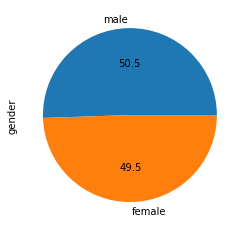

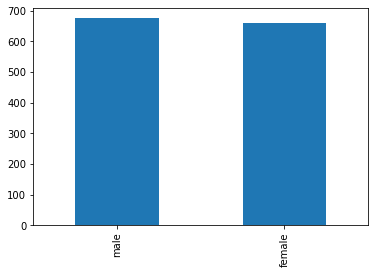

Distribution by gender is balanced


In [59]:
# distribution analysis by gender
insur['gender'].value_counts().plot.pie(autopct = '%1.1f')
plt.show()
insur['gender'].value_counts().plot.bar()
plt.show()
print("Distribution by gender is balanced")

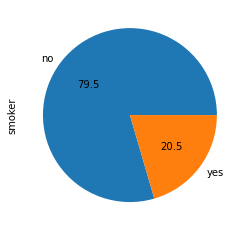

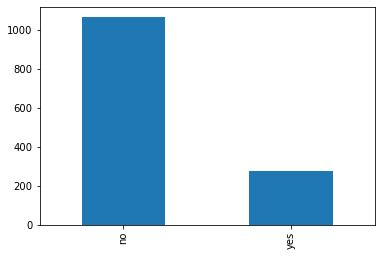

Distribution by smoker is imbalanced, with majority non-smokers


In [61]:
# distribution analysis by smoker
insur['smoker'].value_counts().plot.pie(autopct = '%1.1f')
plt.show()
insur['smoker'].value_counts().plot.bar()
plt.show()
print("Distribution by smoker is imbalanced, with majority non-smokers")

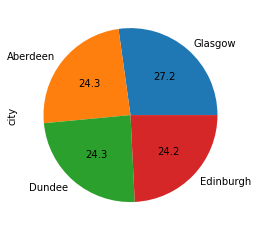

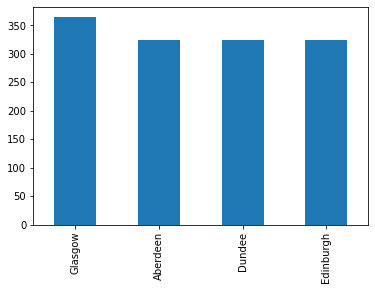

Distribution by smoker is imbalanced, with majority non-smokers


In [62]:
# distribution analysis by city
insur['city'].value_counts().plot.pie(autopct = '%1.1f')
plt.show()
insur['city'].value_counts().plot.bar()
plt.show()
print("Distribution by city seems relatively balanced")

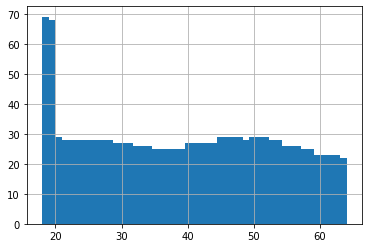

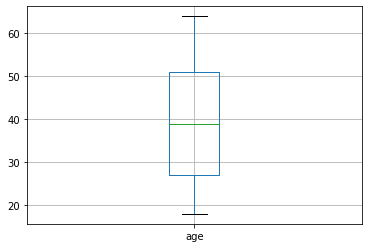

Distribution by city seems fairly uniform apart from large number of 18 and 19 year olds


In [68]:
# distribution analysis by age
insur['age'].hist(bins = (insur.age.max()-insur.age.min()+1))
plt.show()
insur.boxplot('age')
plt.show()
print("Distribution by age seems fairly uniform apart from large number of 18 and 19 year olds")

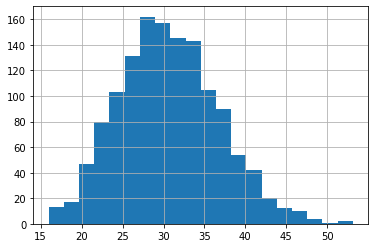

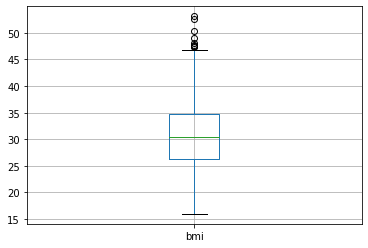

Distribution by city seems fairly uniform apart from large number of 18 and 19 year olds


In [69]:
# distribution analysis by age
insur['bmi'].hist(bins = 20)
plt.show()
insur.boxplot('bmi')
plt.show()
print("Distribution by bmi seems normally distributed around mean of around 30, perhaps with slight positive skew")

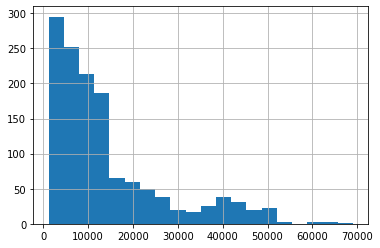

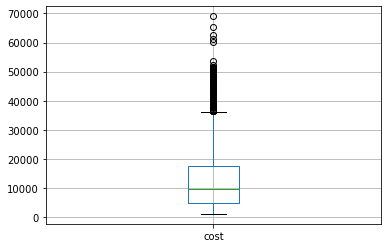

Distribution by cost seems to have a higly positive skew. Most are in range 1-15000
Some rare but presumably non-negligible claims in range 40000-70000


In [73]:
# distribution analysis by cost
insur['cost'].hist(bins = 20)
plt.show()
insur.boxplot('cost')
plt.show()
print("Distribution by cost seems to have a higly positive skew. Most are in range 1-15000")
print("Some rare but presumably non-negligible claims in range 40000-70000")

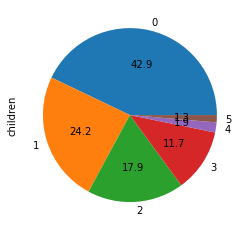

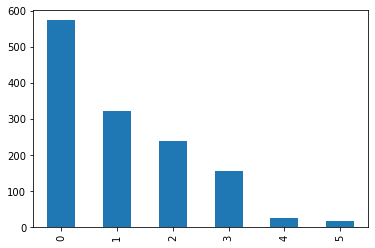

Distribution by children seems is non-uniform, largest group have no children
Number of claims Number of children


In [76]:
# distribution analysis by children
# Numerical, but discrete, so can visualise a category
insur['children'].value_counts().sort_index().plot.pie(autopct = '%1.1f')
plt.show()
insur['children'].value_counts().sort_index().plot.bar()
plt.show()
print("Distribution by children seems is non-uniform, largest group have no children")
print("Over 50% have children, but larger numbers get increasingly less common")

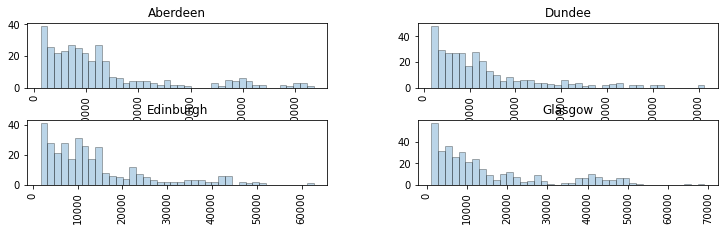

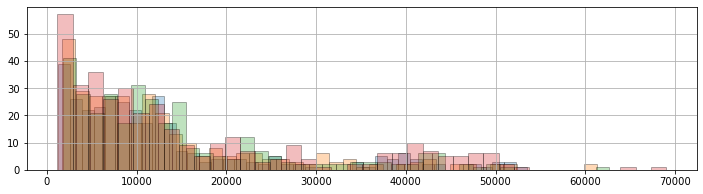

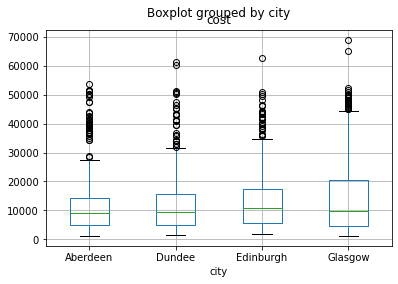

Distribution seems to show a broadly similar median, but Glasgow has larger range of claim values


In [95]:
# distribution analysis of cost by city
insur.hist('cost', by =  'city', alpha = 0.3, edgecolor = "black", bins = 40, figsize = (12,3))
plt.show()
insur.groupby('city')['cost'].hist(alpha = 0.3, edgecolor = "black", bins = 40, figsize = (12,3))
plt.show()
plt.show()
insur.boxplot('cost', by = 'city')
plt.show()
print("Distribution seems to show a broadly similar median, but Glasgow has larger range of claim values")

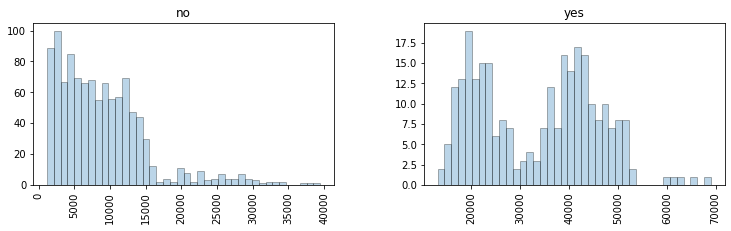

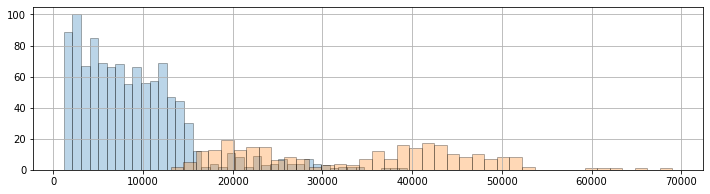

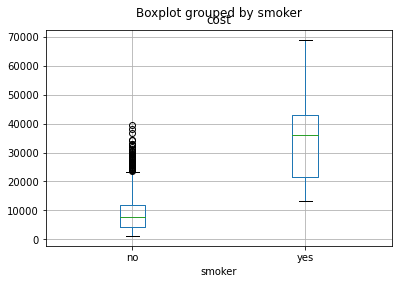

Distribution seems to show a broadly similar median, but Glasgow has larger range of claim values


In [97]:
# distribution analysis of cost by smoker category
insur.hist('cost', by =  'smoker', alpha = 0.3, edgecolor = "black", bins = 40, figsize = (12,3))
plt.show()
insur.groupby('smoker')['cost'].hist(alpha = 0.3, edgecolor = "black", bins = 40, figsize = (12,3))
plt.show()
plt.show()
insur.boxplot('cost', by = 'smoker')
plt.show()
print("Distribution seems to show a very different distribution when split by smoker category")
print("Smokers seem to have much larger median and wider range of caim cost than non-smokers")

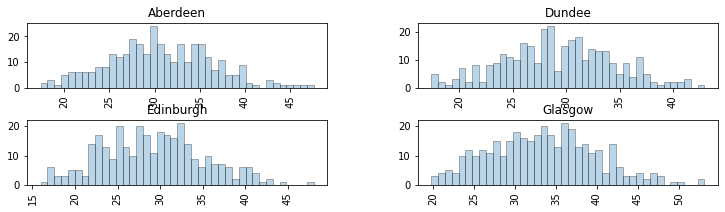

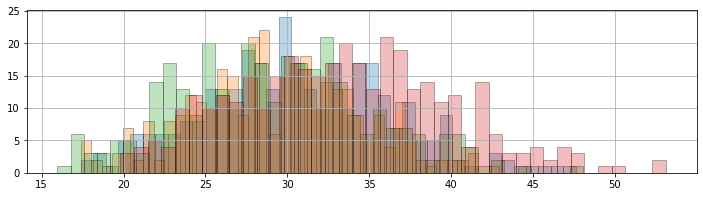

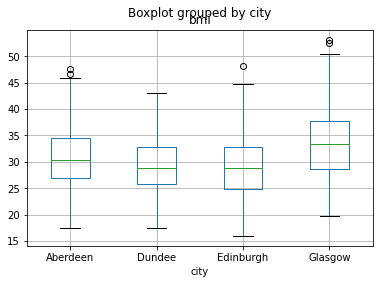

Distribution seems to show a broadly similar median, but Glasgow has larger range of claim values


In [98]:
# distribution analysis by bmi by city
insur.hist('bmi', by =  'city', alpha = 0.3, edgecolor = "black", bins = 40, figsize = (12,3))
plt.show()
insur.groupby('city')['bmi'].hist(alpha = 0.3, edgecolor = "black", bins = 40, figsize = (12,3))
plt.show()
plt.show()
insur.boxplot('bmi', by = 'city')
plt.show()
print("Distribution seems to show that Glasgow has highest median bmi, followed by Aberdeen")

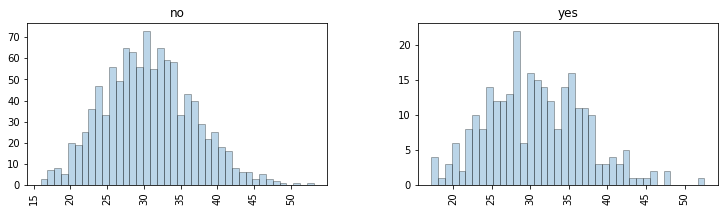

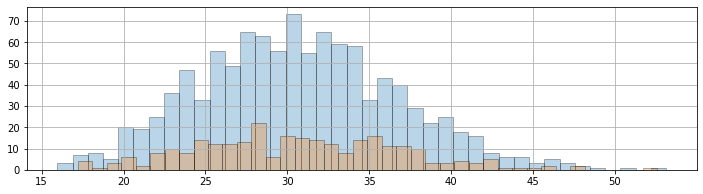

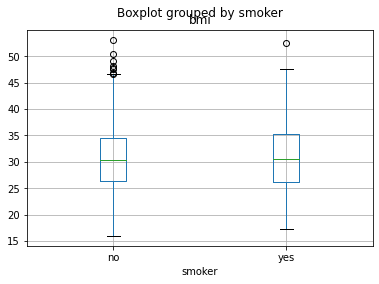

Distribution seems to show that Glasgow has highest median bmi, followed by Aberdeen


In [100]:
# distribution analysis by bmi by city
insur.hist('bmi', by =  'smoker', alpha = 0.3, edgecolor = "black", bins = 40, figsize = (12,3))
plt.show()
insur.groupby('smoker')['bmi'].hist(alpha = 0.3, edgecolor = "black", bins = 40, figsize = (12,3))
plt.show()
plt.show()
insur.boxplot('bmi', by = 'smoker')
plt.show()
print("Smoking does not seem to have a significant effect on bmi")


An insurance company is most likely to wish to predict cost in terms of other factors.


## Task 3 - Loading sample dataset from seaborn

In [102]:
import seaborn
## seaborn is a package that has a useful function for loading sample datasets 
print(seaborn.get_dataset_names())
# this should display a list of around 15 datasets (and some warnings that can be ignored). Load e.g. the titanic dataset

df = seaborn.load_dataset('titanic')
# df is now a DataFrame object containing the data

# investigate its structure e.g.
print(df.columns)
print(df.shape)
df.head(5)



C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Note that some variables are equivalent, but encoded in different ways e.g. 
* survived(0,1)=alive(no,yes)
* pclass(1,2,3)=class(First,Second,Third)
* embarked(S,C,Q)=class(Southhampton, Cherbourg, Queenstown)

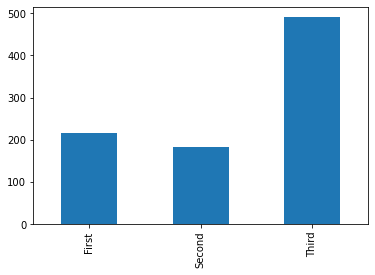

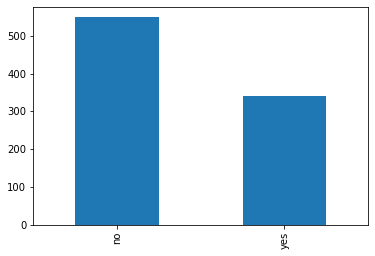

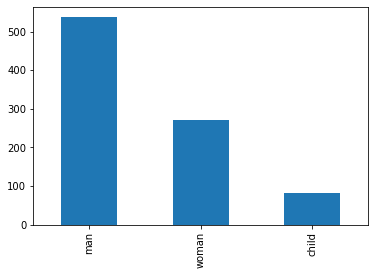

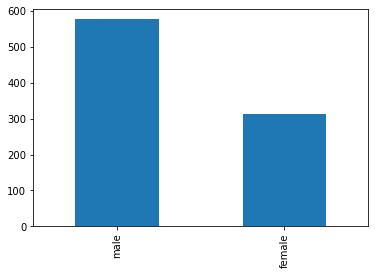

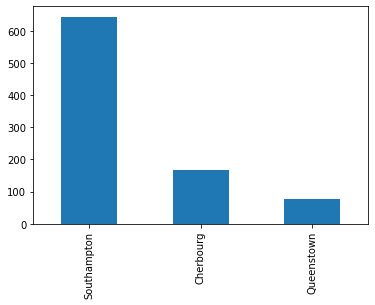

In [116]:
df['class'].value_counts().sort_index().plot.bar()
plt.show()
df['alive'].value_counts().plot.bar()
plt.show()
df['who'].value_counts().plot.bar()
plt.show()
df['sex'].value_counts().plot.bar()
plt.show()
df['embark_town'].value_counts().plot.bar()
plt.show()

In [120]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


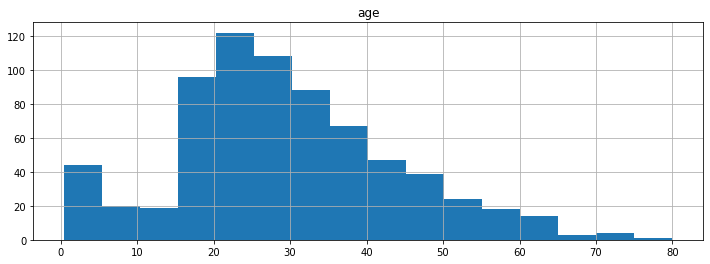

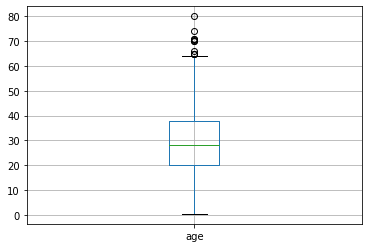

age has peaks in range 20-30, and 0-5, then a positive skew to larger ages


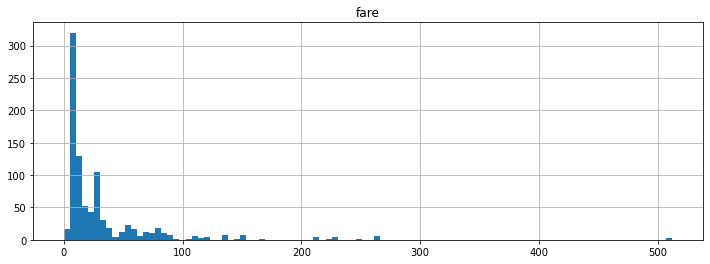

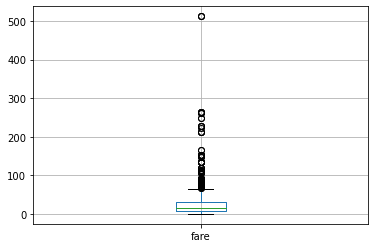

fare has an extreme positive skew


In [129]:

df.hist(column = ['age'], figsize = (12,4), bins = 16)
plt.show()
df.boxplot(column = ['age'])
plt.show()
print("age has peaks in range 20-30, and 0-5, then a positive skew to larger ages")
df.hist(column = ['fare'], figsize = (12,4), bins = 100)
plt.show()
df.boxplot(column = ['fare'])
plt.show()
print("fare has an extreme positive skew")

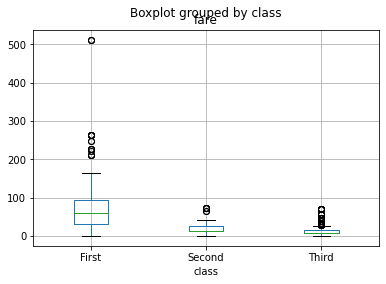

In [130]:
df.boxplot(column = ['fare'], by = 'class')
plt.show()

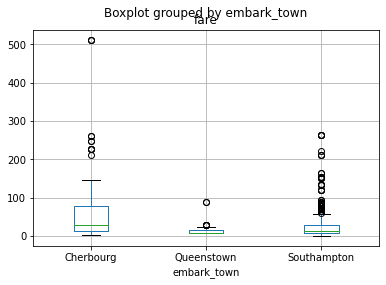

In [131]:
df.boxplot(column = ['fare'], by = 'embark_town')
plt.show()

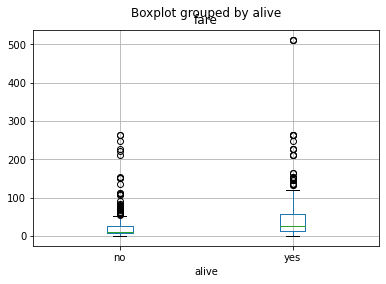

In [132]:
df.boxplot(column = ['fare'], by = 'alive')
plt.show()

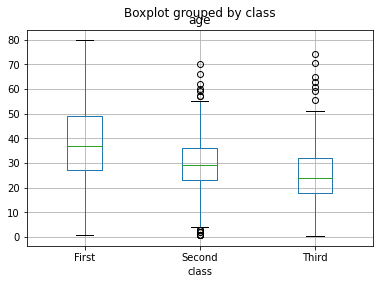

In [133]:
df.boxplot(column = ['age'], by = 'class')
plt.show()

In [ ]:
# (d) Predicting survived/alive is most likely "target" variable